<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Improved_Training_of_Wasserstein_GANsipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Improved Training of Wasserstein GANs**

논문 링크: https://arxiv.org/abs/1704.00028?ref=hackernoon.com

WGAN-GP은 **기존 WGAN에서 critic에 대해 Lipschitz constraint를 강요하기 위한 weight clipping이 발생시키는 문제(undesired behavior)를 해결**하기 위해 나왔다. weight clipping 대신 다른 것을 제안했는데, 입력에 대해 critic의 gradient norm을 처벌한다.

(기존 GAN의 문제를 좀 더 쉽게 설명하자면, clipping parameter c가 크면 limit(c 혹은 -c)까지 도달하는 시간이 매우 오래 걸린다. 반대로 작은 경우는 gradient vash 문제가 발생한다. 또한 regularizer로써 작용하여 함수 f의 capacity를 줄인다는 것도 있다.)

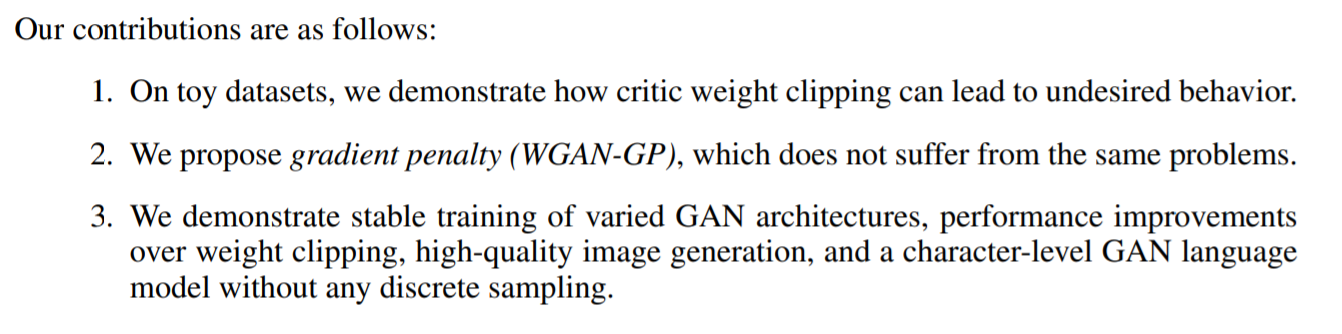

본 논문이 주장하는 위와 같다. 한국어로 풀어 쓰면 다음과 같다.
1. Toy datasets에 대해 critic의 weight clipping이 undesired behavior를 유발하는 것을 증명한다.
2. **Gradient penalty**(=WGAN-GP)를 제안함으로인해 기존 WGAN의 문제에 시달리지 않는다.
3. 다양한 GAN 구조에 대해 안정적인 학습을 증명하고, weight clipping에 대한 성능 향상, 고품질 이미지 생성, 개별 샘플링이 없이 문자 수준의 GAN 언어모델을 선보인다.

GAN과 WGAN을 알고 있다면, 아래 GAN과 WGAN을 무시하고 바로 WGAN-GP로 넘어가도 된다.

## **GAN**

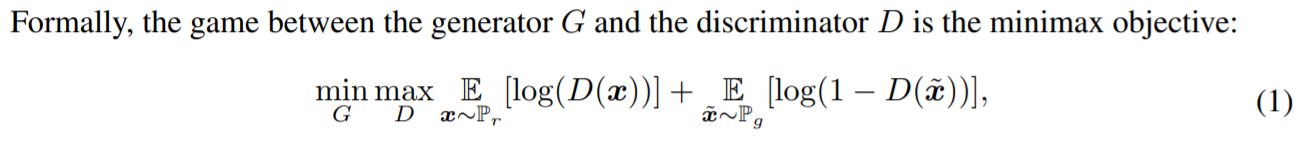

GAN(= original gan = vanilla gan)의 목적 함수는 위와 같다. minimax 게임으로 생각하면 쉽다.

만약에 각 generator 파라미터가 update되기 전에 discriminator가 최적으로 합슫되었다면, 가치 함수 Pr과 Pg사이의 JS Divergence를 최소화할 수 있지만, 그럴 경우 discriminator가 포화되는 **(saturates) vanishing gradients 문제**를 유발 할 수 있다.

더 자세히 알고 싶다면: https://github.com/viriditass/Papers/blob/main/Generative_Adversarial_Nets.ipynb

## **WGAN**

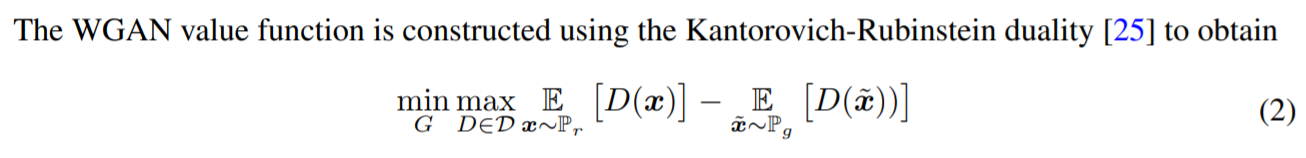

WGAN은 GAN이 전형적으로 최소화하려는 JSD가 generator의 parameter에 대해 연속적이지 않아 학습이 문제가 된다며 Earth-Mover distance W(q, p)를 대신 사용했다. 유한 가정하에서 W(q,p)는 모든 구간에서 연속이고 거의 모든 곳에서 미분 가능하다. WGAN 가치 함수는 **Karntorovich-Rubinstein duality**를 이용해 구성된다.

WGAN은 GAN보다 입력에 대한 gradient가 더 잘 동작하여 generator의 최적화를 더 쉽게하는 critic function을 만든다. 또한 WGAN의 가치 함수가 sample의 품질과 상관관계가 있다는 것을 찾아냈다. 하지만 critic에 Lipschitz constraint를 적용하기 위해선 ciritc의 가중치를 clip하여 compact space [-c,c]에 배치해야 한다.

WGAN에 대해 알고 싶다면: 

https://github.com/viriditass/Papers/blob/main/Wasserstein_GAN.ipynb

WGAN과 WGAN-GP를 좀 더 쉽게 이해하고 싶다면:

https://github.com/viriditass/Papers/blob/main/From_GAN_to_WGAN.ipynb

## **WGAN-GP**

WGAN에서 weight clipping이 최적화에 문제를 발생시키는다는 것을 찾았으며, 최적화가 잘 되더라도 critic이 걷잡을 수 없는 값(pathological value surface)를 가질 수 있다.

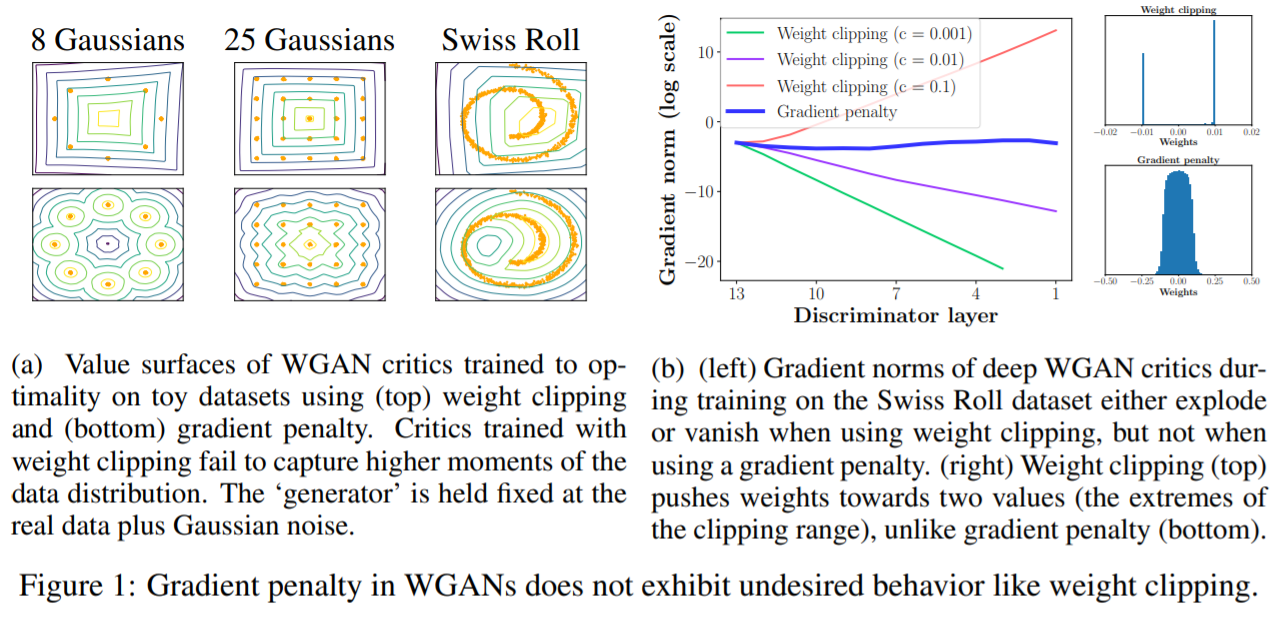

위의 그림 Figure 1을 보겠다. 

(a) 실험에서는 위는 weight clipping을, 반대로 아래는 gradient penalty를 toy dataset에 최적으로 학습시킨 WGAN critic의 value surface다. weight clipping으로 학습한 critics는 데이터 분포의 higher moments를 잡아내는데 실패했다. generator는 실제 데이터와 gaussian noise에 고정되어 있다.

(b) 실험에서는 왼쪽은 Swiss Roll dataset에 대해서 학습시키는 도중 weight clipping을 사용할 때 발생하는 vanish/explode를 보여주고 gradient penalty 사용시 문재가 발생하지 않는 것을 보여주는 deep WGAN critics의 gradient norm이다.
오른쪽 부분에서 상단이 그림은 **weight clipping이 두 값으로만 weights를 쏠리게 하는 것**을 볼 수 있으며, 하단은 gradient penalty로 그러지 않는 것을 볼 수 있다.

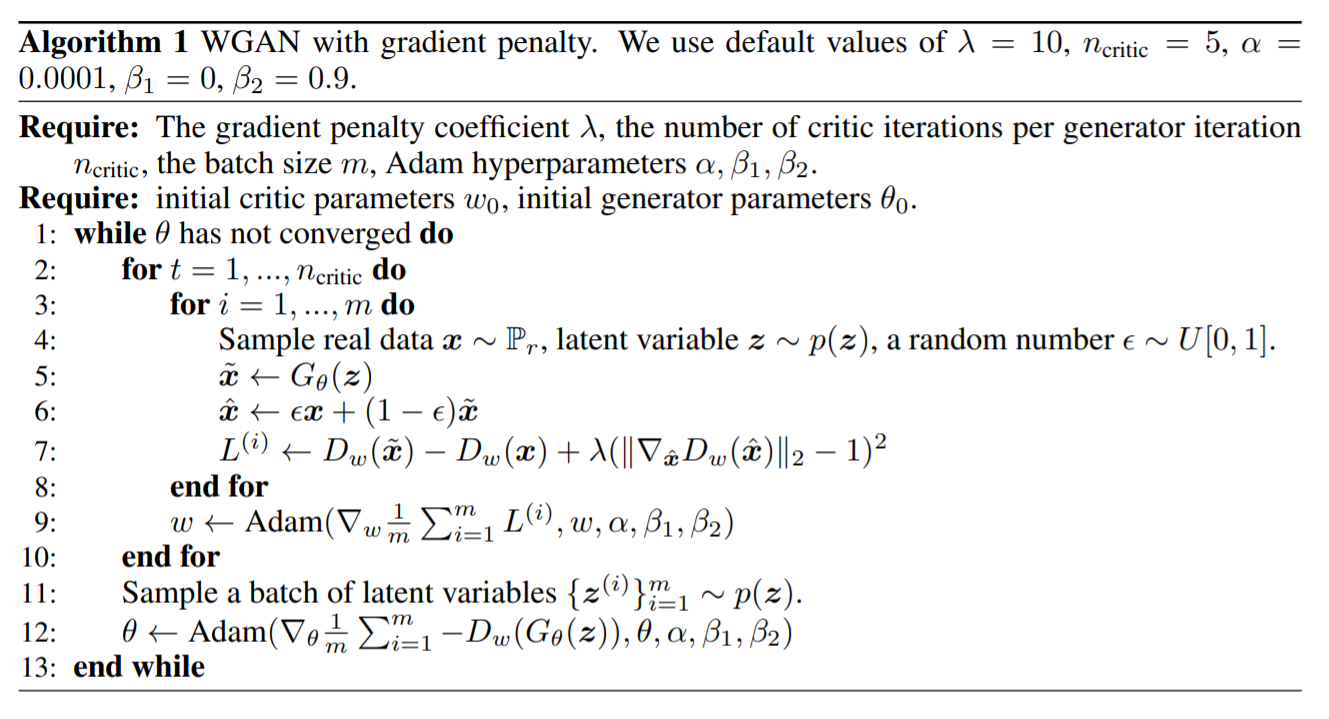

weight clipping 제약하에서 논문에서는 최대 gradient norm k를 달성하려고 신경망 구조들이 단순한 기능을 학습하는 것을 알아냈다. 이를 증명하기 위해, generator Pg는 실제 데이터 분포 + unit-variance gaussian noise에 고정시키고, WGAN critic을 weight clipping으로 여러 toy 분포에 최적화하기 위해 학습했다. value surface의 경우, 위의 그림 Figure 1에 (a)에 나타나 있다. 그리고 **논문에서는 critic에서의 batch normalization을 생략했다.** batch normalization을 생략한 이유는 선행 GAN에서는 학습 안정을 위해 사용했지만, batch normalization은 discriminator의 단일 입력을 단일 출력으로 매핑하는 문제로부터, 입력 전체 배치로부터 출력의 배치로 매핑하는 문제로 유형을 변화시킨다. 기존에 전체 배치가 아니라 각 입력에 독리적으로 critic의 gradient norm을 처벌하기 때문에, 논문의 패털티를 주는 학습에 이런 환경에 더 이상 유효하지 않다. 이를 해결하기 위해, critic에서 batch normalization을 생략하고 이를 대체로 layer normalization을 추천한다.

이러한 경우에, weight clipping으로 학습된 critic은 데이터 분포의 higher moments를 무시하지만, 대신 최적의 기능에 대한 매우 간단한 근사치를 모델링한다. 

### **Gradient penalty**

이제 WGAN-GP의 핵심인 GP를 보겠다.

Gradient penalty가 바로 Lipschitz constraint를 시행할 수 있는 대안이다. 미분가능한 함수는 모든 곳에서 gradients norm이 1이어야만 1-Lipschtiz이다. 따라서 입력과 관련하여 critic의 결과의 gradient norm을 직접 규제하는 것을 고려한다.

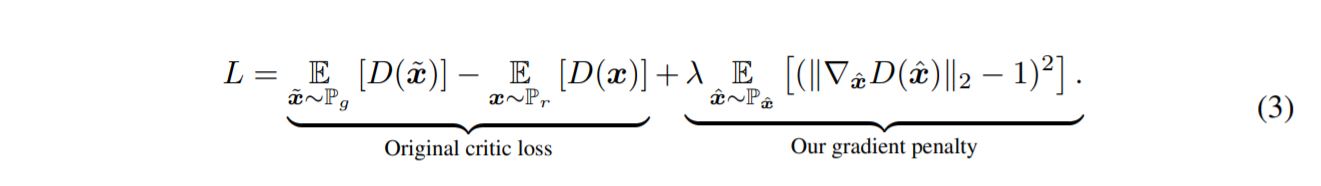

위의 식과 같이 기존 WGAN loss에 random sample x ~ Px에 대해 gradient norm에 패널티와 함께 soft한 버전의 제약을 준다. 저 식에서 λ(람다)는 세기의 강도를 정하는 hyper-parameter이다. (논문에서는 모든 실험에서 λ = 10)

본 논문에서는 gradient의 norm이 **1 아래에 머무르기(one-sided penalty)**보다는 **1로 향하기(two-sided penalty)**를 촉진한다.

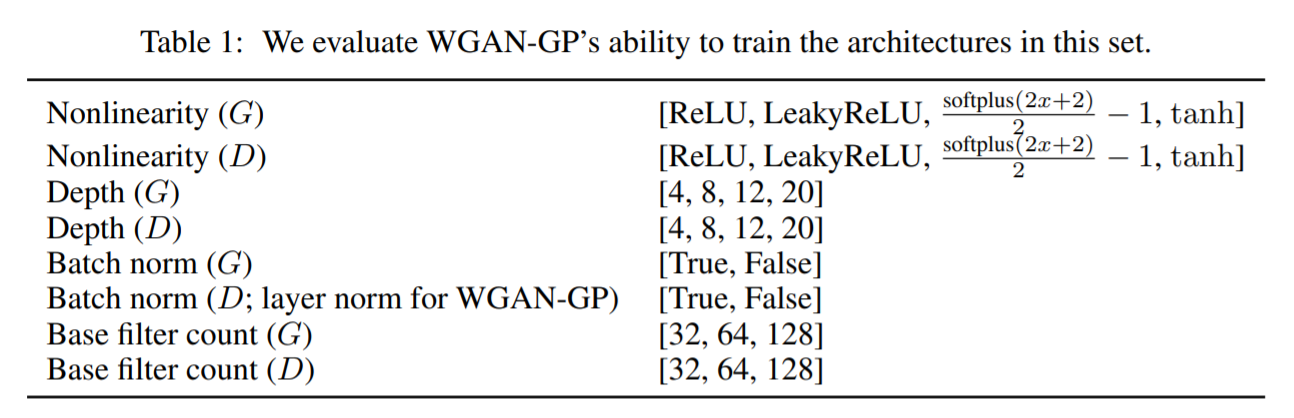

DCGAN 구조에서 위의 테이블 Table 1에 대응하는 값으로 변경하여 구조를 바꿨다.

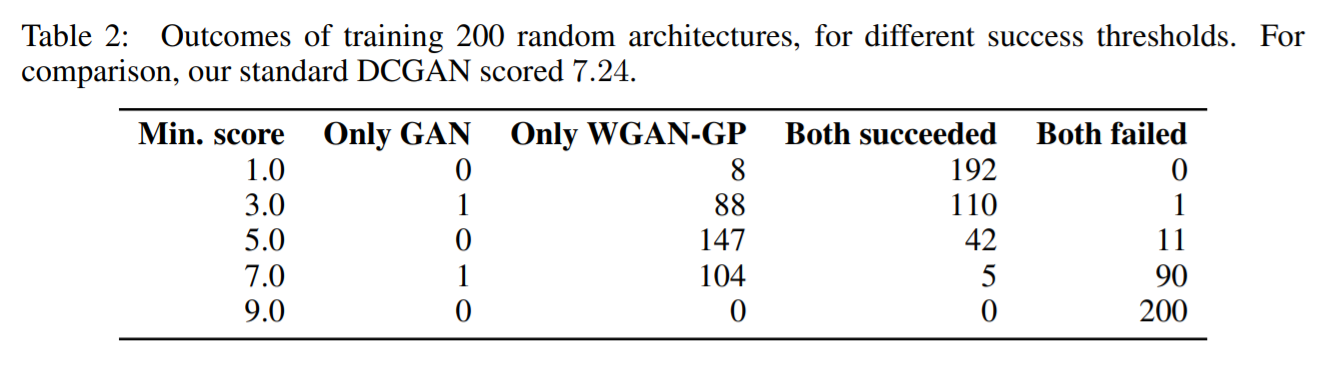

이 세트로부터 200개의 구조를 sample하여 32 x 32 ImageNet에 대해 WGAN-GP, standard GAN을 학습했다. 위의 테이블 Table 2는 경우의 수를 말하는데, 성공의 기준은 inception_score > min_score이다. WGAN-GP의 경우 많은 구조들이 학습하는데 성공했다.

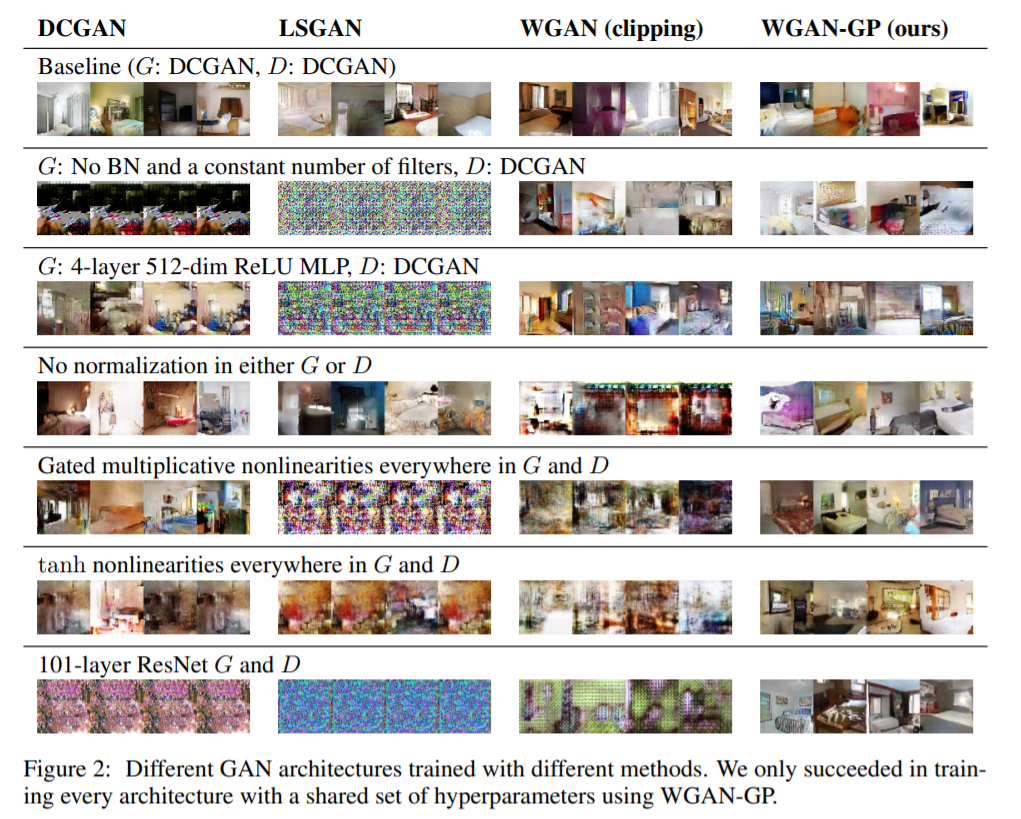

위의 그림 Figure 2는 다른 방법으로 학습된 다른 GAN 구조들인데, WGAN-GP에서만 잘 성공한 것을 알 수 있다. (참고로 데이터셋은 LSUN bedrooms 데이터셋이다.)

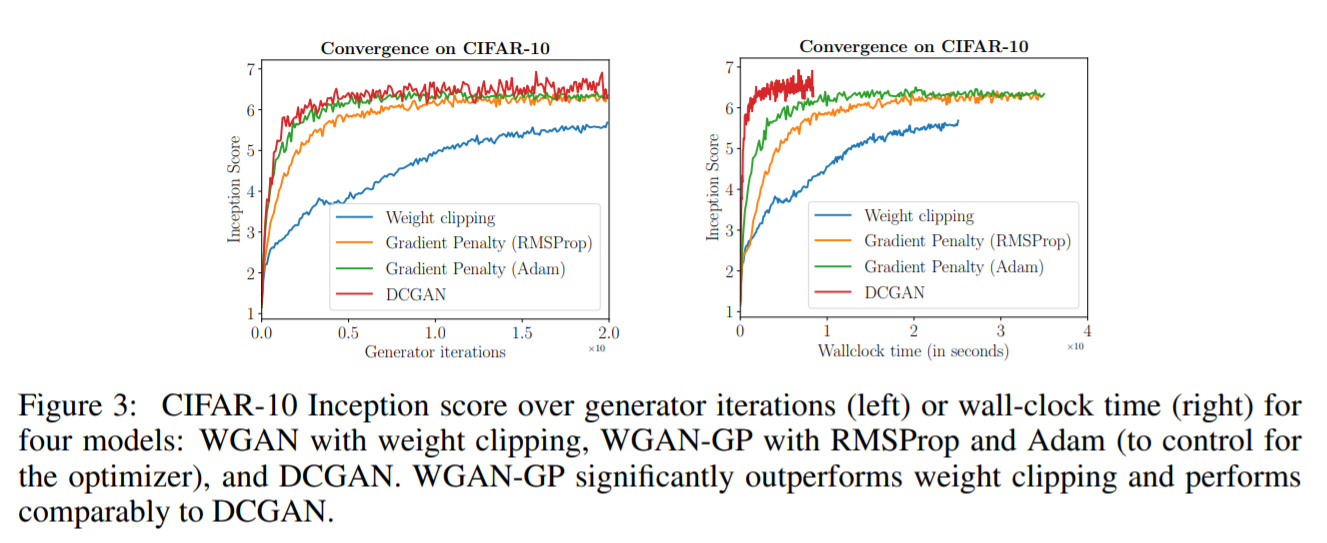

위의 그림 Figure 3에서 왼쪽은 iteration에 따른 Inception score이고 오른쪽은 시간에 따른 Inception Score이다. 모델각은 각각 weight clipping, GP(RMSProp), GP(Adam), DCGAN이다. WGAN-GP가 weight clipping 보다 성능이 좋으며 DCGAN과 비슷한다. 그리고 RMSProp를 쓸 때는, weight clipping과 같은 learning rate를 사용하며 Adam을 사용할 경우는 더 높은 learning rate를 사용한다. DCGAN보다는 수렴속도가 느리지만, 수렴에 있어서 점수가 더욱 안정적인 것을 알 수 있다.